# Project description

In this project, we'll explore the effectiveness of deep, feedforward neural networks at classifying images, we'll gradually build a neural network by adding hidden layers and by testing with differents models. Train, test, and improve a few different deep neural networks for image classification. We will also compare neural networks with K-NearestNeighbours and Decision Tree models. 

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of sklearn.datasets. The load_digits() function returns a copy of the hand-written digits dataset from UCI.

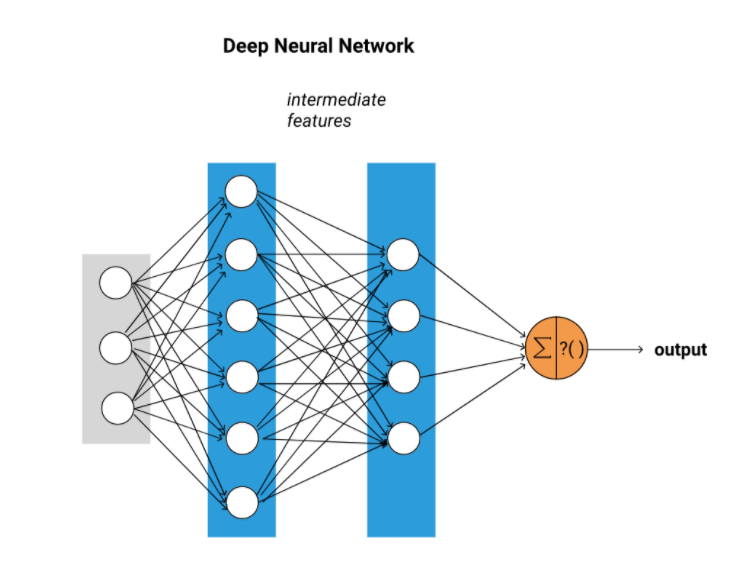

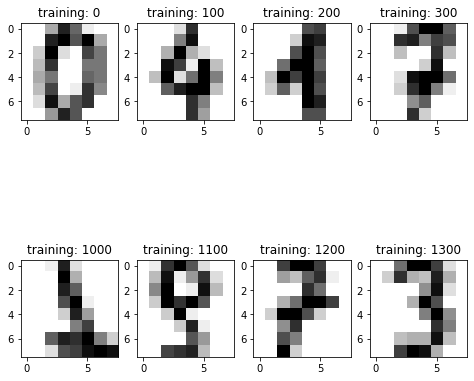

In [1]:
#visualising the data

from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline


data, target = load_digits(return_X_y = True)
features= pd.DataFrame(data)
target= pd.Series(target)

image_rows= [0,100,200,300,1000,1100,1200,1300]

fig= plt.figure(figsize=(8,8))
n= 0
for r in image_rows:
    image_feature= features.iloc[r]
    np_image= image_feature.values
    np_image= np_image.reshape(8,8)
    ax= fig.add_subplot(2,4,n+1)
    n+= 1
    ax.set_title("training: %i"%r)

    ax.imshow(np_image, cmap= "gray_r")
    
plt.show()

While linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption. This allows them to capture nonlinearity in the data. Here we use a KNN algorithm as a benchmark to compare our neural network against.

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

def train(k,features,target):
    knn= KNeighborsClassifier(n_neighbors= k)
    knn.fit(features,target)
    return knn

def test(knn,features,target):
    prediction= knn.predict(features)
    return accuracy_score(target,prediction)

#doing 4 fold cross validation
def cross_validate(k, features, target):
    kf = KFold(n_splits=4,shuffle=True,random_state=2)
    train_accuracies = []
    test_accuracies = []
    
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]

        knn = train(k, train_features, train_target)
        train_accuracy = test(knn, train_features, train_target)
        test_accuracy = test(knn, test_features, test_target)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    return train_accuracies, test_accuracies

In [3]:
#we use 10 neighbors because 10 digits
train_accuracies, test_accuracies = cross_validate(10,features,target)
mean_train_accuracies= np.mean(train_accuracies)
mean_test_accuracies= np.mean(test_accuracies)

print("4-Fold Mean Training Accuracy is:",mean_train_accuracies)
print("4-Fold Mean Test Accuracy is:",mean_test_accuracies)

4-Fold Mean Training Accuracy is: 0.9872006481047013
4-Fold Mean Test Accuracy is: 0.9788591932689928


There are a few downsides to using k-nearest neighbors:

1) high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
2) no model representation to debug and explore

We train a neural network instead with varying neuron values and layers.

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning




def train(layers,features,target):
    mlp = MLPClassifier(hidden_layer_sizes=layers,activation="logistic")
    mlp.fit(features,target)
    return mlp

def test(mlp,features,target):
    prediction= mlp.predict(features)
    return accuracy_score(target,prediction)

@ignore_warnings(category=ConvergenceWarning)
#doing k-fold cross validation
def cross_validate(k, layers, features, target):
    kf = KFold(n_splits=4,shuffle=True,random_state=2)
    train_accuracies = []
    test_accuracies = []
    
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]

        mlp = train(layers, train_features, train_target)
        train_accuracy = test(mlp, train_features, train_target)
        test_accuracy = test(mlp, test_features, test_target)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    return np.mean(train_accuracies), np.mean(test_accuracies)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
#training a neural network with one layer
neuron_list = [8,16,32,64,128,256]
mean_train_accuracy_list = []
mean_test_accuracy_list = []


for neuron in neuron_list:
    mean_train_accuracies,mean_test_accuracies = cross_validate(4, (neuron,), features, target)
    mean_train_accuracy_list.append(mean_train_accuracies)
    mean_test_accuracy_list.append(mean_test_accuracies)
    


[]

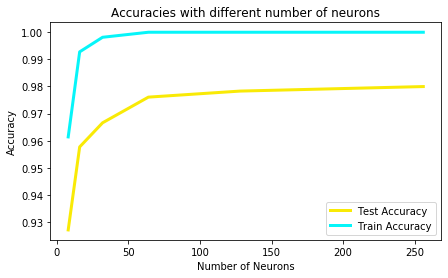

In [6]:
#plots
x = neuron_list
y_train= mean_train_accuracy_list
y_test= mean_test_accuracy_list

fig,ax= plt.subplots(figsize=(7,4))
ax.plot(x,y_test, c= (249/255,234/255,6/255), linewidth=3, label='Test Accuracy')
ax.plot(x,y_train, c= (6/255, 245/255, 249/255), linewidth=3, label='Train Accuracy')
ax.set_xlabel("Number of Neurons")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracies with different number of neurons")
ax.legend(loc="lower right")
plt.plot()


### Summary:

It looks like adding more neurons to the single hidden layer improved simple accuracy to approximately 97%. Simple accuracy computes the number of correct classifications the model made, but doesn't tell us anything about false or true positives or false or true negatives.

Given that k-nearest neighbors achieved approximately 98% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

In [7]:
#training a neural network with two layer
neuron_list = [8,16,32,64,128,256]
mean_train_accuracy_list = []
mean_test_accuracy_list = []

for neuron in neuron_list:
    mean_train_accuracies,mean_test_accuracies = cross_validate(4, (neuron, neuron), features, target)
    mean_train_accuracy_list.append(mean_train_accuracies)
    mean_test_accuracy_list.append(mean_test_accuracies)
    


[]

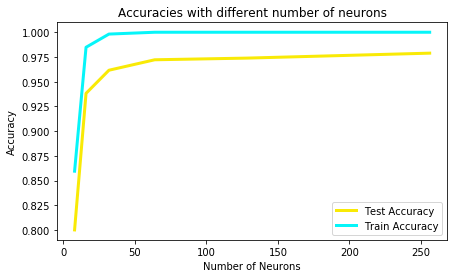

In [8]:
#plots
x = neuron_list
y_train= mean_train_accuracy_list
y_test= mean_test_accuracy_list

fig,ax= plt.subplots(figsize=(7,4))
ax.plot(x,y_test, c= (249/255,234/255,6/255), linewidth=3, label='Test Accuracy')
ax.plot(x,y_train, c= (6/255, 245/255, 249/255), linewidth=3, label='Train Accuracy')
ax.set_xlabel("Number of Neurons")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracies with different number of neurons")
ax.legend(loc="lower right")
plt.plot()

# Summary

Using 2 hidden layers does not improve test accuracy substantially, and also increases computational time and risk of overfitting. Hence, 1 hidden layer is sufficient. But it does not seem to have a substantial benefit over KNN.

# Comparison With Decision Tree Models

Neural networks are actually very similar to how decision trees are structured. The branches and splits represent some intermediate features that are useful for making predictions and are analogous to the hidden layers in a neural network:

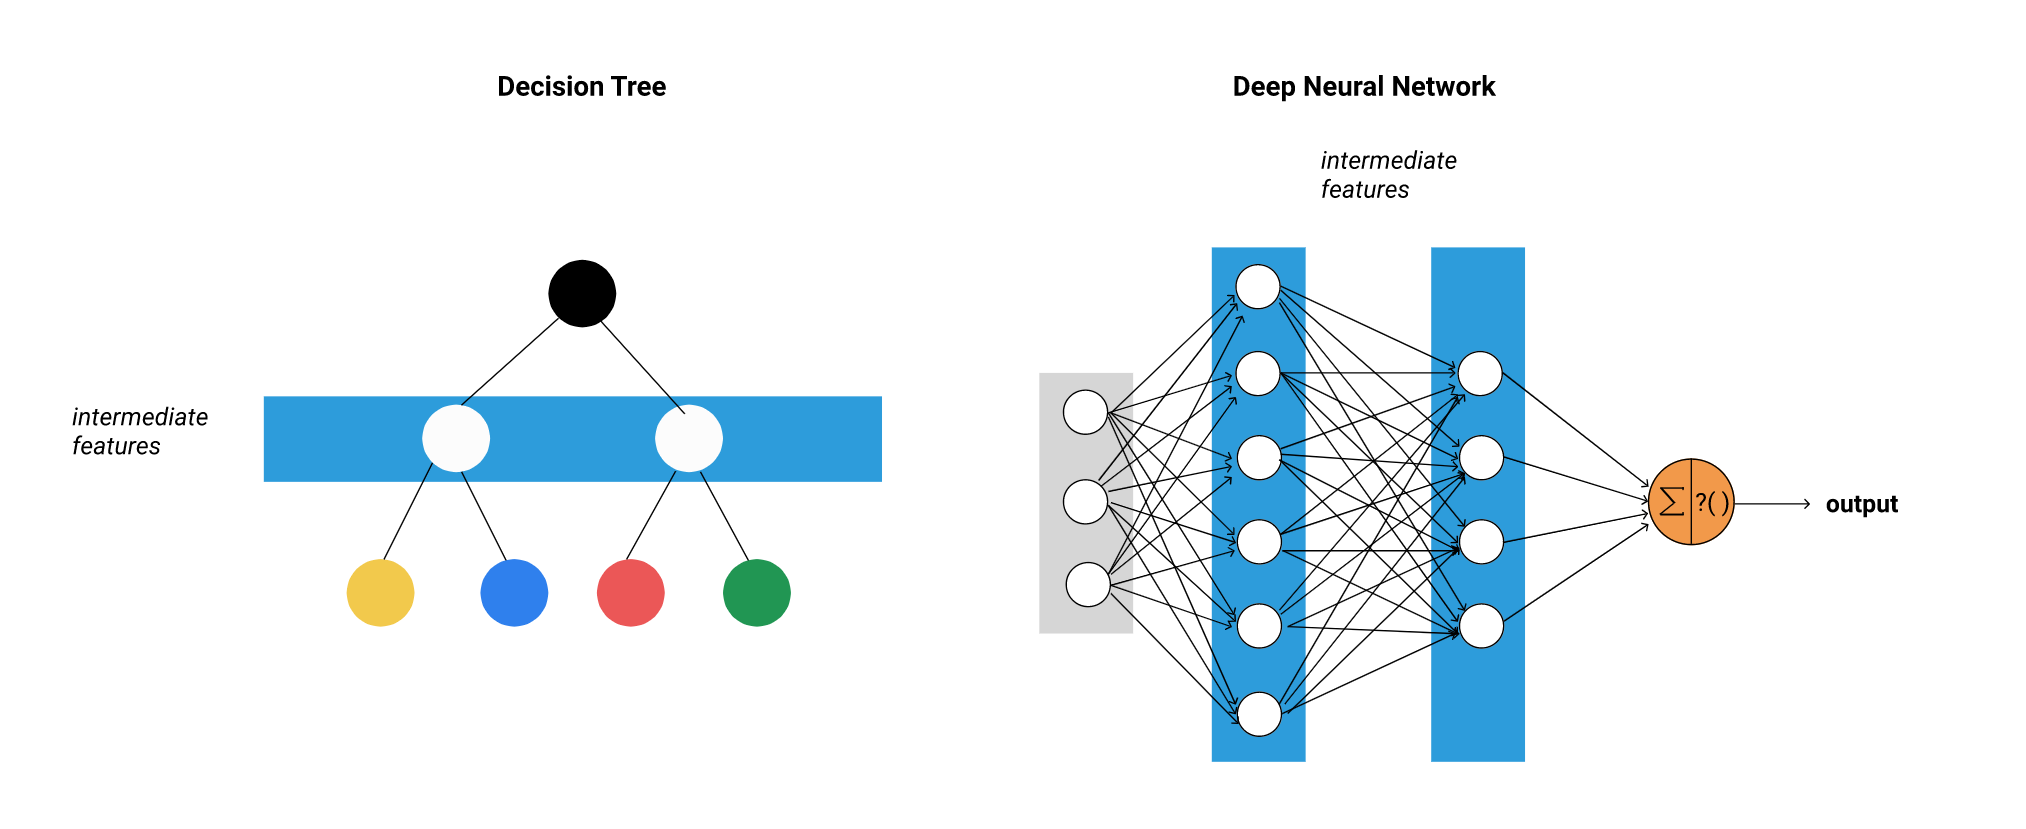

Each of these hidden layers has its own set of weights and biases, which are discovered during the training process. In decision tree models, the intermediate features in the model represented something more concrete we can understand (feature ranges).

Decision tree models are referred to as white box models because they can be observed and understood but not easily altered. After we train a decision tree model, we can visualize the tree, interpret it, and have new ideas for tweaking the model. Neural networks, on the other hand, are much closer to being a black box. In a black box model, we can understand the inputs and the outputs but the intermediate features are actually difficult to interpret and understand. Even harder and perhaps more importantly, it's difficult to understand how to tweak a neural network based on these intermediate features.

In [9]:
# building a decision tree model with varying leaves number
from sklearn.tree import DecisionTreeClassifier

def train(m_s_l,train,target):
    dt= DecisionTreeClassifier(min_samples_leaf= m_s_l)
    dt.fit(train,target)
    return dt

def cross_validate(k,m_s_l,features,target):
    kf = KFold(n_splits= k, random_state=2, shuffle= True)
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]

        dt = train(m_s_l,train_features, train_target)
        train_accuracy = test(dt, train_features, train_target)
        test_accuracy = test(dt, test_features, test_target)
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    return train_accuracies, test_accuracies

In [10]:
### let's test it, with cross validation in 4-fold

min_samples_leafs= [1,2,3,4,5,6,7,8,9,10]
train_accuracies_d= []
test_accuracies_d= []

for m in min_samples_leafs:
    train_accuracies,test_accuracies= cross_validate(4,m,features,target)
    train_accuracies_d.append(np.mean(train_accuracies))
    test_accuracies_d.append(np.mean(test_accuracies))


[]

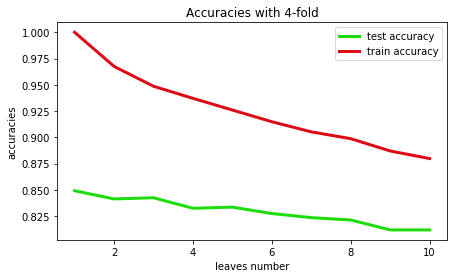

In [11]:
### let's visualize it

x= range(1,11)
y_test= test_accuracies_d
y_train= train_accuracies_d
fig,ax= plt.subplots(figsize=(7,4))
ax.plot(x,y_test, c= (28/255,221/255,9/255), linewidth=3, label='test accuracy')
ax.plot(x,y_train, c= (221/255, 9/255, 21/255), linewidth=3, label='train accuracy')
ax.set_xlabel("leaves number")
ax.set_ylabel("accuracies")
ax.set_title("Accuracies with 4-fold")
ax.legend(loc="upper right")
plt.plot()

# Summary

Decision tree models perform notably worse than neural networks and KNN, with lower test accuracy.
Since the features of an image is made up of pixel brightness, the advantage of interpretability of decision tree models is lost as well since it is hard to interpret the feature splits of pixel brightness.